In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_home='./datasets')
print(mnist.data.shape)

(70000, 784)


d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

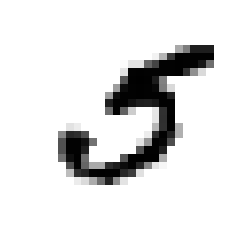

In [9]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[36000]

5.0

In [10]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)   #打乱顺序
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

### 训练一个二分类器

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
from sklearn.linear_model import SGDClassifier   #随机梯度下降法Stochastic Gradient Descent (SGD)

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

#### 性能评估

##### 交叉验证评估精度

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

array([0.96035, 0.9655 , 0.9631 ])

In [37]:
from sklearn.base import BaseEstimator

In [38]:
class Never5Classifier(BaseEstimator):     #计算不是5的得分
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [39]:
never_5_clf = Never5Classifier()

In [40]:
cross_val_score(never_5_clf,X_train, y_train_5,cv=3,scoring='accuracy')

array([0.91035, 0.9096 , 0.909  ])

#### 混淆矩阵 Confusion Matrix

In [51]:
from sklearn.model_selection import cross_val_predict

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

In [112]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53358,  1221],
       [ 1087,  4334]], dtype=int64)

##### 精度和召回率（Precision and Recall）

In [61]:
from sklearn.metrics import  precision_score,recall_score

In [62]:
precision_score(y_train_5,y_train_pred)   #精度

0.8700277520814061

In [63]:
recall_score(y_train_5,y_train_pred)      #召回率

0.6939679026009962

In [64]:
from sklearn.metrics import f1_score    #可以将精度和召回率组合成一个被称为F1值的指标  F1得分  调和平均数
f1_score(y_train_5,y_train_pred)

0.7720882503848128

##### 精度/召回率折中（precision/recall tradeoff）  Page87

In [65]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-125486.39070564, -491622.15347005, -247590.772234  ,
        -241137.11588407, -413377.56368867,    9111.96351025,
        -743626.09739478, -409981.58508688, -535107.09652076,
        -569732.74641596]])

In [66]:
threshold = 0

In [67]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False,  True, False, False, False,
        False]])

In [68]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [69]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

In [70]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

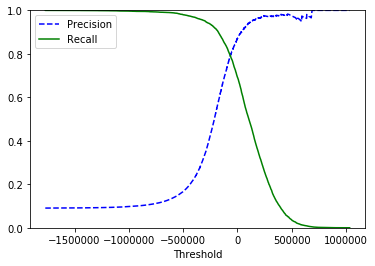

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [72]:
y_train_pred_90 = (y_scores > 70000)

In [73]:
precision_score(y_train_5,y_train_pred_90)

0.9212836815016652

In [74]:
recall_score(y_train_5,y_train_pred_90)

0.5613355469470578

#### ROC曲线（receiver operating characteristic）

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

In [77]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth=2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    

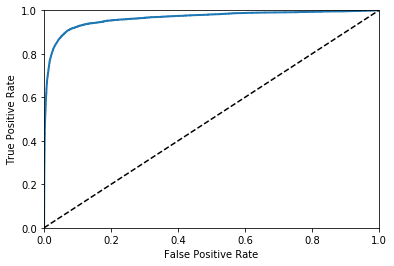

In [78]:
plot_roc_curve(fpr,tpr)

In [79]:
from sklearn.metrics import roc_auc_score    #计算曲线下面积（AUC）
roc_auc_score(y_train_5,y_scores)

0.9642067825514143

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
forest_clf = RandomForestClassifier(random_state=42)

In [82]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3,method='predict_proba')

d:\python3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
y_scores_forest = y_probas_forest[:,1]

In [84]:
fpr_forest, tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

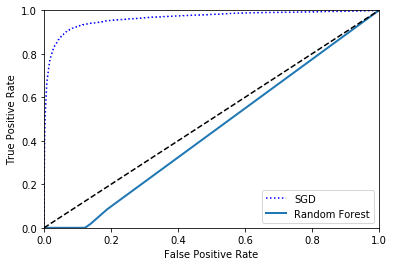

In [86]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [87]:
roc_auc_score(y_train_5,y_scores_forest)

0.44303226306819277

### 多元分类

In [91]:
sgd_clf.fit(X_train, y_train)

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
sgd_clf.predict([some_digit])

array([5.])

In [93]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-125486.39070564, -491622.15347005, -247590.772234  ,
        -241137.11588407, -413377.56368867,    9111.96351025,
        -743626.09739478, -409981.58508688, -535107.09652076,
        -569732.74641596]])

In [94]:
np.argmax(some_digit_scores)

5

In [95]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [96]:
sgd_clf.classes_[5]

5.0

In [97]:
from sklearn.multiclass import OneVsOneClassifier

In [98]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [99]:
ovo_clf.fit(X_train,y_train)

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [100]:
ovo_clf.predict([some_digit])

array([5.])

In [101]:
len(ovo_clf.estimators_)

45

In [102]:
forest_clf.fit(X_train,y_train)

d:\python3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
forest_clf.predict([some_digit])

array([5.])

In [104]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [105]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

array([0.82493501, 0.86269313, 0.87023053])

In [106]:
from sklearn.preprocessing import StandardScaler  #先将训练集标准化，让结果更好
scaler = StandardScaler()

In [107]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [109]:
cross_val_score(sgd_clf,X_train_scaled,y_train, cv=3,scoring="accuracy")

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

array([0.90576885, 0.91349567, 0.91088663])

#### 误差分析（Error Analysis）

In [110]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

In [113]:
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5726,    3,   22,    9,   10,   55,   48,    8,   38,    4],
       [   1, 6484,   45,   26,    6,   38,    5,    7,  117,   13],
       [  57,   35, 5344,   95,   79,   32,   97,   51,  152,   16],
       [  47,   44,  140, 5334,    4,  238,   36,   51,  137,  100],
       [  20,   27,   34,   12, 5378,   11,   58,   27,   72,  203],
       [  66,   46,   29,  200,   72, 4609,  104,   26,  172,   97],
       [  34,   25,   43,    2,   44,   93, 5634,    5,   38,    0],
       [  21,   22,   72,   26,   51,   14,    5, 5804,   16,  234],
       [  49,  158,   71,  160,   16,  169,   55,   25, 5004,  144],
       [  41,   33,   25,   81,  169,   37,    3,  200,   74, 5286]],
      dtype=int64)

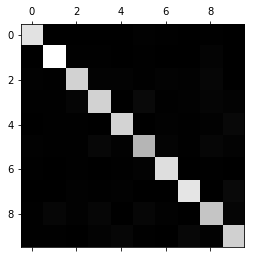

In [114]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [115]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

In [116]:
norm_conf_mx = conf_mx / row_sums

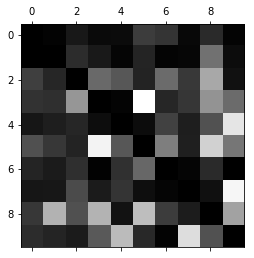

In [117]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

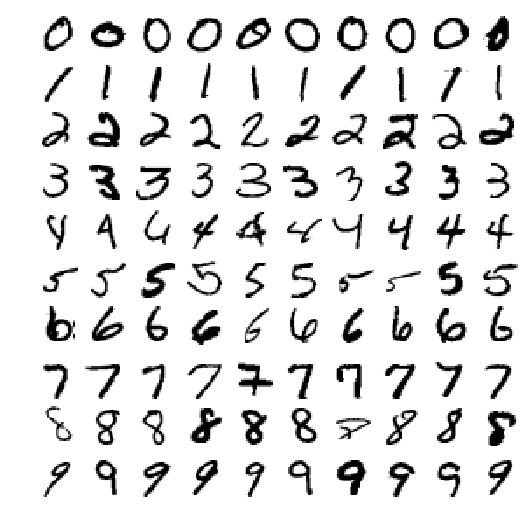

In [93]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [94]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

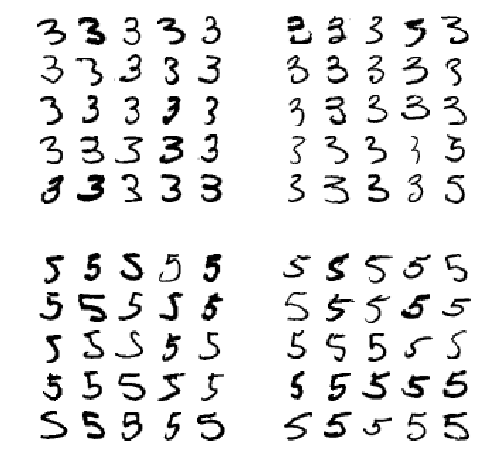

In [95]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

#### 多标签分类（Multilabel Classification）

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1 )
y_multilabel = np.c_[y_train_large,y_train_odd]

In [120]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_pred,average="macro")

#### 多输出分类 Multioutput Classification

In [ ]:
noise = np.random.randint(0,100,(len(X_train),784))
noise = np.random.randint(0,100,(len(X_test),784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn.clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)